<a href="https://colab.research.google.com/github/asab77/MAT-422/blob/main/Homework3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

K-means is an unsupervised clustering algorithm that aims to partition a set of \( n \) data points \( X = \{x_1, x_2, \dots, x_n\} \) into \( k \) clusters. The algorithm iteratively assigns each point to one of \( k \) clusters, each represented by a centroid. The goal is to minimize the total within-cluster variance, defined as:

\[
J = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
\]

where:
- \( C_i \) represents the set of points in the \( i \)-th cluster.
- \( \mu_i \) is the mean (centroid) of points in \( C_i \).
- \( \| x - \mu_i \|^2 \) is the squared Euclidean distance between a point \( x \) and the centroid \( \mu_i \).

### Steps of the K-means Algorithm
1. **Initialization**: Choose \( k \) initial centroids randomly or using a method like \( k \)-means++.
2. **Assignment**: For each data point \( x \), assign it to the nearest centroid \( \mu_i \).
3. **Update**: Calculate new centroids as the mean of all points assigned to each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change or a maximum number of iterations is reached.

### Key Parameters
- **\( k \)**: Number of clusters.
- **`init`**: Method for initializing centroids, commonly \( k \)-means++ or random.
- **`max_iter`**: Maximum number of iterations for convergence.
- **`n_init`**: Number of times the algorithm runs with different centroid seeds to find the best outcome.


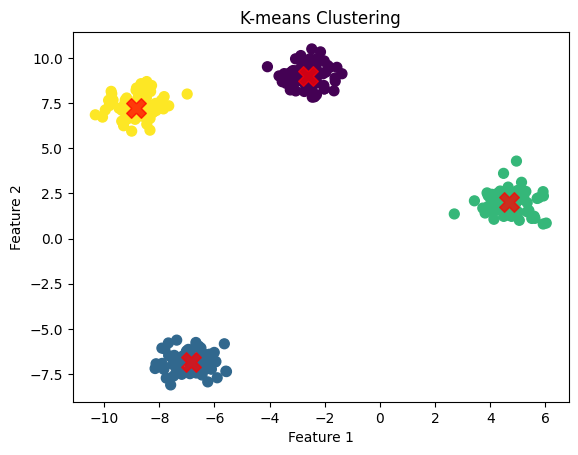

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.6)

# Apply K-means
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plotting clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Support Vector Machine (SVM)

Support Vector Machines (SVM) is a supervised learning algorithm used primarily for binary classification tasks. It finds the optimal hyperplane that maximizes the margin between two classes in a feature space, leading to better generalization on unseen data.

### Key Concepts
1. **Hyperplane**: In a two-dimensional space, a hyperplane is a line that separates data points from two classes. In \( n \)-dimensional space, it is an \( n-1 \) dimensional plane.
2. **Margin**: The margin is the distance between the hyperplane and the closest data points from either class, known as support vectors. The objective of SVM is to maximize this margin.

For a linearly separable dataset, the decision boundary can be expressed as:

\[
w \cdot x + b = 0
\]

where:
- \( w \) is the weight vector perpendicular to the hyperplane.
- \( b \) is the bias term, defining the offset of the hyperplane from the origin.

### Optimization Objective
The optimization objective for an SVM can be formulated as:

\[
\text{Minimize } \frac{1}{2} \| w \|^2
\]

subject to the constraints:

\[
y_i (w \cdot x_i + b) \geq 1, \quad \forall i = 1, \dots, n
\]

where \( y_i \) is the class label for data point \( x_i \) (either \( +1 \) or \( -1 \)).

### Key Parameters
- **\( C \)**: Regularization parameter that controls the trade-off between maximizing the margin and minimizing classification error.
- **`kernel`**: Type of kernel function used for transforming data into higher dimensions (e.g., linear, polynomial, radial basis function).
- **`gamma`**: Kernel coefficient for 'rbf' or 'poly' kernels, controlling the influence of individual training points.
- **`degree`**: Degree of the polynomial kernel (if used), controlling the flexibility of the decision boundary.

### Support Vectors
Support vectors are the data points that lie closest to the hyperplane. They have a direct impact on the position and orientation of the decision boundary. Only these points are relevant to defining the model, making SVM efficient for high-dimensional spaces.


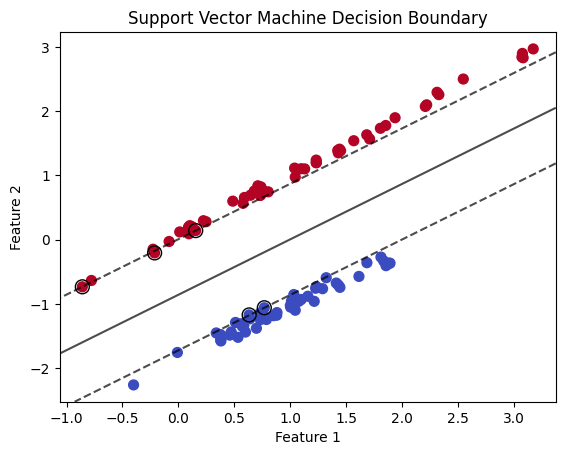

In [3]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Fit the SVM model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Plotting decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vector Machine Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
